# Deep Learning for Image Analysis (DLIM)

**Subject**: Generation of Japanese paintings from sketches

**Authors**:

- Nicolas Blin (nicolas.blin@epita.fr)
- Ilan Guenet (ilan.guenet@epita.fr)
- Quentin Kaci (quentin.kaci@epita.fr)
- Theo Lepage (theo.lepage@epita.fr)

---

# Part 1 - Data

## Table of content

1. [Imports](#section-imports)
2. [Download images](#section-download)
3. [Visualize data](#section-visualize)
4. [Load and filter images](#section-load)
5. [Extract edges](#section-edges)
6. [Postprocess HED edges](#section-postprocess_hed)
7. [Create training data](#section-create_samples)
8. [Create zip file and download](#section-create_zip)

In [2]:
ARTIST_URLS_STYLE_1 = [
    # Early Ukiyo-e (Early-Mid 1700s)
    'https://ukiyo-e.org/artist/okumura-masanobu',
    'https://ukiyo-e.org/artist/hishikawa-moronobu',
    'https://ukiyo-e.org/artist/torii-kiyomasu-ii',
    'https://ukiyo-e.org/artist/nishikawa-sukenobu',
    'https://ukiyo-e.org/artist/torii-kiyonobu-ii',
    'https://ukiyo-e.org/artist/torii-kiyomasu-i',
    'https://ukiyo-e.org/artist/nishimura-shigenaga',
    'https://ukiyo-e.org/artist/torii-kiyonobu-i',
    'https://ukiyo-e.org/artist/torii-kiyotada-i',
    'https://ukiyo-e.org/artist/okumura-toshinobu',
    
    # Birth of Full-Color Printing (1740s to 1780s)
    'https://ukiyo-e.org/artist/katsukawa-shunsho',
    'https://ukiyo-e.org/artist/suzuki-harunobu',
    'https://ukiyo-e.org/artist/isoda-koryusai',
    'https://ukiyo-e.org/artist/katsukawa-shunko',
    'https://ukiyo-e.org/artist/katsukawa-shunei',
    'https://ukiyo-e.org/artist/ippitsusai-buncho',
    'https://ukiyo-e.org/artist/torii-kiyomitsu',
    'https://ukiyo-e.org/artist/kitao-shigemasa',
    'https://ukiyo-e.org/artist/utagawa-toyoharu',
    'https://ukiyo-e.org/artist/ishikawa-toyonobu',
    'https://ukiyo-e.org/artist/torii-kiyotsune',
    'https://ukiyo-e.org/artist/torii-kiyohiro',
    'https://ukiyo-e.org/artist/katsukawa-shunsen',
    
    # Golden Age of Ukiyo-e (1780 to 1804)
    'https://ukiyo-e.org/artist/kitagawa-utamaro',
    'https://ukiyo-e.org/artist/torii-kiyonaga',
    'https://ukiyo-e.org/artist/toshusai-sharaku',
    'https://ukiyo-e.org/artist/hosoda-eishi',
    'https://ukiyo-e.org/artist/katsukawa-shuncho',
    'https://ukiyo-e.org/artist/kubo-shunman',
    'https://ukiyo-e.org/artist/eishosai-choki',
    'https://ukiyo-e.org/artist/kitao-masayoshi',
    'https://ukiyo-e.org/artist/katsukawa-shunzan',
    'https://ukiyo-e.org/artist/chokosai-eisho',
    'https://ukiyo-e.org/artist/utagawa-kunimasa',
    'https://ukiyo-e.org/artist/ichirakutei-eisui'
]

ARTIST_URLS_STYLE_2 = [
    # Popularization of Woodblock Printing (1804 to 1868)
    'https://ukiyo-e.org/artist/utagawa-hiroshige',
    'https://ukiyo-e.org/artist/utagawa-hiroshige-ii'
]

<a id="section-imports"></a>

## Imports

In [1]:
SEED = 1717

In [3]:
import numpy as np
from PIL import Image

import requests
from bs4 import BeautifulSoup
from io import BytesIO

from pathlib import Path
from tqdm import tqdm

In [4]:
np.random.seed(SEED)

<a id="section-download"></a>

## Download images

In [5]:
LIMIT_NB_IMAGES = 5000

In [6]:
def parse_page(url, page):
    page = '?start=' + str(page * 100)
    content = requests.get('{}{}'.format(url, page)).content
    soup = BeautifulSoup(content)
    elements = soup.find('div', {'id': 'results'}).findChildren('img')
    return elements
    
def get_image_urls_from_artist(artist_url):
    urls = []
    page = 0
    elements = parse_page(artist_url, page)
    while elements:
        for element in elements:
            image_url = element.get('src').replace('thumbs', 'images')
            urls.append(image_url)
        page += 1
        elements = parse_page(artist_url, page)
    return urls

In [7]:
def download_images(artist_urls, dataset_name, limit=-1):
    dataset_path = Path('ukiyo-e') / dataset_name
    dataset_path.mkdir(parents=True, exist_ok=True)
    
    # Fetch URLs from all artists
    print('Fetching image URLs of {}...'.format(dataset_name))
    artist_ids = []
    image_urls = []
    for artist_url in artist_urls:
        artist_id = artist_url.split('/')[-1]
        urls = get_image_urls_from_artist(artist_url)
        artist_ids.extend([artist_id] * len(urls))
        image_urls.extend(urls)
    
    indices = np.arange(len(image_urls))
    if limit > 0:
        indices = np.random.choice(indices, size=limit, replace=False)
    
    # Download images
    desc = 'Downloading images of {}'.format(dataset_name)
    for i in tqdm(indices, desc=desc, ncols=120):
        artist_dir = dataset_path / artist_ids[i]
        artist_dir.mkdir(parents=True, exist_ok=True)
        img_path = artist_dir / image_urls[i].split('/')[-1]

        try:
            img_data = requests.get(image_urls[i]).content
            Image.open(BytesIO(img_data)).convert('RGB').save(img_path)
        except:
            pass
            # print('Cannot download {}'.format(image_urls[i]))

In [8]:
!rm -rf ukiyo-e

In [9]:
download_images(ARTIST_URLS_STYLE_1, "style_1", limit=LIMIT_NB_IMAGES)

Fetching image URLs of style_1...


In [10]:
download_images(ARTIST_URLS_STYLE_2, "style_2", limit=LIMIT_NB_IMAGES)

Fetching image URLs of style_2...


<a id="section-visualize"></a>

## Visualize data

In [8]:
from glob import glob
from matplotlib import pyplot as plt

In [9]:
def plot_artists(dataset_name, limit=3):
    artists = glob('ukiyo-e/{}/*'.format(dataset_name))[:limit]
    for artist_dir in artists:
        artist_id = artist_dir.split('/')[-1]
        artist_images = glob(artist_dir + '/*.jpg')

        plt.imshow(plt.imread(artist_images[0]))
        plt.axis('off')
        plt.title(artist_id + ' - ' + str(len(artist_images)) + ' image(s)')
        plt.show()

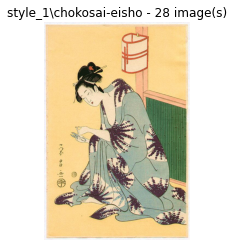

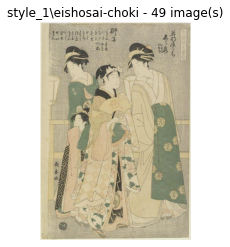

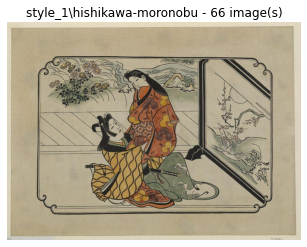

In [10]:
plot_artists('style_1')

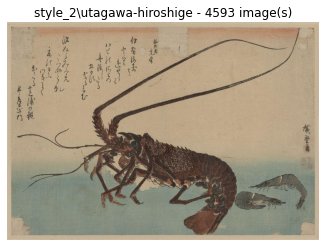

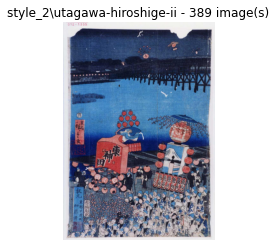

In [11]:
plot_artists('style_2')

In [12]:
def plot_images_of_artist(dataset_name, artist, limit=5):
    images = glob('ukiyo-e/{}/{}/*.jpg'.format(dataset_name, artist))
    for image in images[:limit]:
        plt.imshow(plt.imread(image))
        plt.axis('off')
        plt.show()

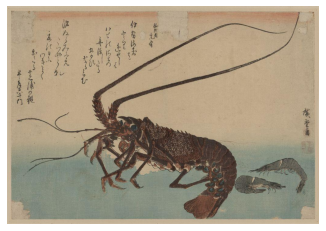

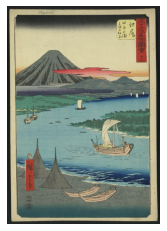

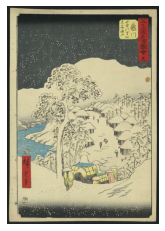

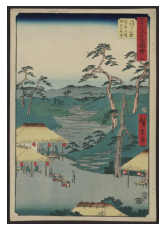

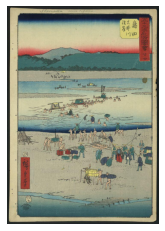

In [13]:
plot_images_of_artist('style_2', 'utagawa-hiroshige')

<a id="section-load"></a>

## Load and filter images

In [14]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

MAX_RATIO = 3

In [15]:
def is_image_grayscale(image):
    return np.all(image[:, :, 0] == image[:, :, 1]) and np.all(image[:, :, 0] == image[:, :, 2])

def filter_image(image):
    w, h = image.shape[:2]
    if h / w > MAX_RATIO or w / h > MAX_RATIO:
        return False
    
    if is_image_grayscale(image):
        return False
    
    return True

In [16]:
def load_image(image_path):
    image = Image.open(image_path)
    image = image.resize((IMAGE_HEIGHT, IMAGE_WIDTH))
    return np.array(image)

<a id="section-edges"></a>

## Extract edges

In [17]:
HED_THRESHOLD = 170
HED_POSTPROCESS_MIN_SIZE = 64

CANNY_THRESHOLD_1 = 100
CANNY_THRESHOLD_2 = 200

In [18]:
import subprocess
import cv2
from skimage.morphology import thin, skeletonize, remove_small_objects

In [22]:
!git clone https://github.com/sniklaus/pytorch-hed.git

# Remove assert from script
!sed -i '141,142d' pytorch-hed/run.py

Cloning into 'pytorch-hed'...


In [19]:
def extract_hed_edges(image, threshold=HED_THRESHOLD):
    in_path = 'tmp_hed_before.jpg'
    out_path = 'tmp_hed_after.jpg'

    Image.fromarray(image).save(in_path)
    
    cmd = 'python pytorch-hed/run.py --model bsds500 --in %s --out %s'
    subprocess.call(cmd % (in_path, out_path), shell=True)
    
    image = np.array(Image.open(out_path))
    image = np.where(image < threshold, 255, 0).astype(np.uint8)
    return image

In [20]:
def extract_canny_edges(image):
    return 255 - cv2.Canny(image=image, threshold1=CANNY_THRESHOLD_1, threshold2=CANNY_THRESHOLD_2)

In [21]:
example_image_path = glob('ukiyo-e/style_2/**/*.jpg')[0]
example_image = load_image(example_image_path) 

(-0.5, 255.5, 255.5, -0.5)

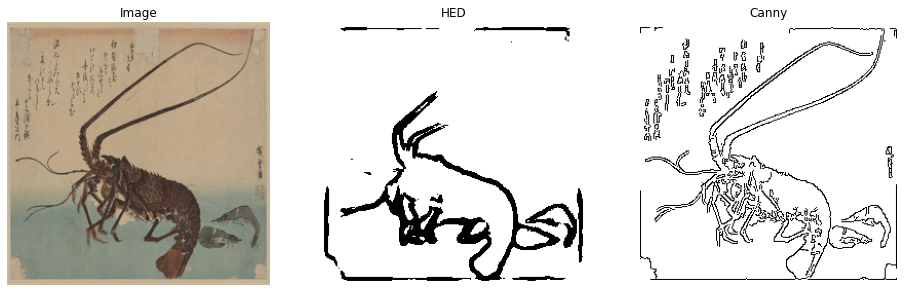

In [22]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.title('Image')
plt.imshow(example_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('HED')
plt.imshow(extract_hed_edges(example_image), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Canny')
plt.imshow(extract_canny_edges(example_image), cmap='gray')
plt.axis('off')

<a id="section-postprocess_hed"></a>

## Postprocess HED edges

In [23]:
def postprocess_hed_edges(image):
    image = image.astype(np.float32) / 255
    
    image = thin(1 - image)
    
    image = 1 - remove_small_objects(image, min_size=HED_POSTPROCESS_MIN_SIZE, connectivity=8)
    
    image = image.astype(np.uint8) * 255
    return image

(-0.5, 255.5, 255.5, -0.5)

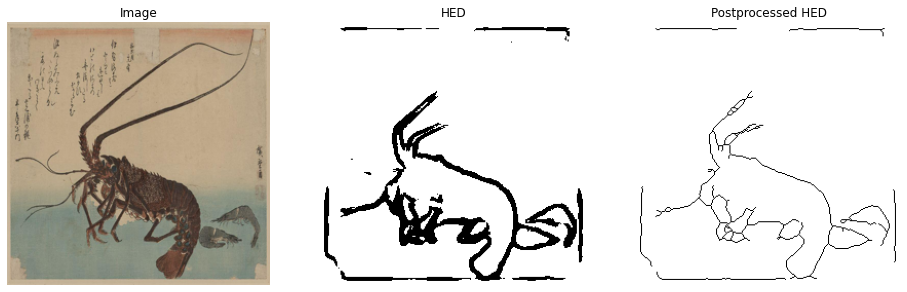

In [24]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.title('Image')
plt.imshow(example_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('HED')
plt.imshow(extract_hed_edges(example_image), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Postprocessed HED')
plt.imshow(postprocess_hed_edges(extract_hed_edges(example_image)), cmap='gray')
plt.axis('off')

<a id="section-create_samples"></a>

## Create training data

In [25]:
TEST_RATIO = 0.1

In [26]:
from enum import Enum

class EdgesType(Enum):
    HED = 1
    CANNY = 2

In [27]:
def grayscale_to_rgb(image):
    return np.repeat(image[:, :, np.newaxis], 3, axis=-1)

In [28]:
def create_training_sample(image, edges_type=EdgesType.HED):
    if edges_type == EdgesType.HED:
        edges = postprocess_hed_edges(extract_hed_edges(image))
    elif edges_type == EdgesType.CANNY:
        edges = extract_canny_edges(image)
    edges = grayscale_to_rgb(edges)
    image = np.concatenate((edges, image), axis=1)
    return image

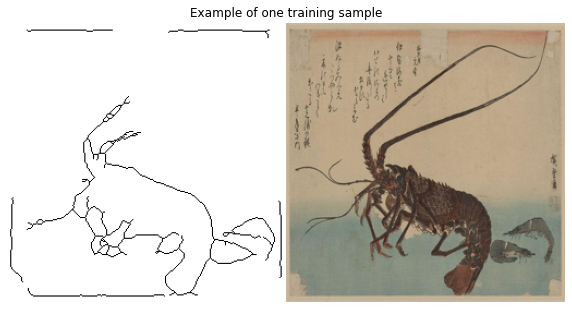

Sample shape: (256, 512, 3)


In [29]:
sample = create_training_sample(example_image)

plt.figure(figsize=(10, 10))
plt.title('Example of one training sample')
plt.imshow(sample)
plt.axis('off')
plt.show()

print('Sample shape:', sample.shape)

In [50]:
def generate_dataset(dataset_name, edges_type=EdgesType.HED, visualize=True):
    dataset_path = Path('dataset') / dataset_name / edges_type.name
    (dataset_path / 'train').mkdir(parents=True, exist_ok=True)
    (dataset_path / 'test').mkdir(parents=True, exist_ok=True)
    
    images = glob('ukiyo-e/{}/**/*.jpg'.format(dataset_name))
    
    nb_test_samples = int(TEST_RATIO * len(images))
    test_idx = np.random.choice(np.arange(len(images)), size=(nb_test_samples,), replace=False)
    
    desc = 'Creating {}'.format(str(dataset_path))
    for i, image_path in enumerate(tqdm(images, desc=desc, ncols=110)):
        try:
            image = load_image(image_path)
        except:
            continue
        
        if not filter_image(image):
            continue

        # Generate and save training sample
        sample = create_training_sample(image, edges_type)

        sample_name = str(i) + '.jpg'
        sample_subset = 'test' if i in test_idx else 'train'
        out_path = dataset_path / sample_subset / sample_name
        Image.fromarray(sample).save(str(out_path))
        
        if visualize and i % 1000 == 0:
            plt.imshow(sample, cmap='gray')
            plt.axis('off')
            plt.show()

In [51]:
!rm -rf dataset

Creating dataset\style_1\HED:   0%|                                                  | 0/4990 [00:00<?, ?it/s]

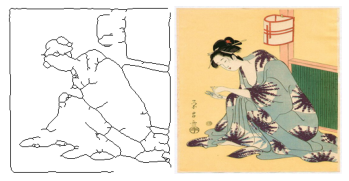

Creating dataset\style_1\HED:  20%|███████▍                             | 1000/4990 [22:34<1:34:45,  1.42s/it]

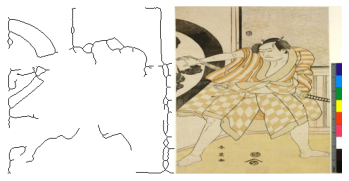

Creating dataset\style_1\HED:  40%|██████████████▊                      | 2000/4990 [45:58<1:13:03,  1.47s/it]

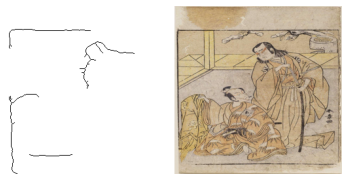

Creating dataset\style_1\HED:  60%|██████████████████████▏              | 3000/4990 [1:05:13<42:13,  1.27s/it]

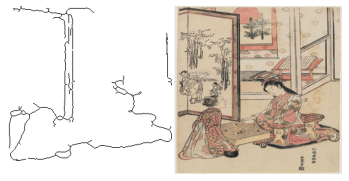

Creating dataset\style_1\HED:  80%|█████████████████████████████▋       | 4000/4990 [1:24:27<20:34,  1.25s/it]

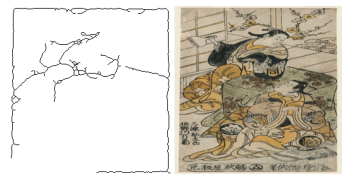

Creating dataset\style_1\HED: 100%|█████████████████████████████████████| 4990/4990 [1:43:38<00:00,  1.25s/it]


In [52]:
generate_dataset('style_1', EdgesType.HED, visualize=True)

Creating dataset\style_1\CANNY:   0%|                                                | 0/4990 [00:00<?, ?it/s]

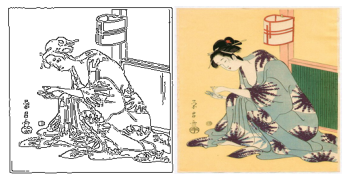

Creating dataset\style_1\CANNY:  20%|███████▌                              | 996/4990 [00:19<00:42, 94.51it/s]

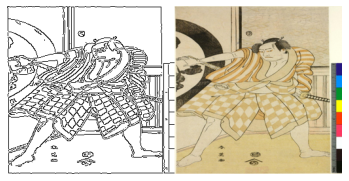

Creating dataset\style_1\CANNY:  40%|██████████████▊                      | 1998/4990 [00:38<01:08, 43.77it/s]

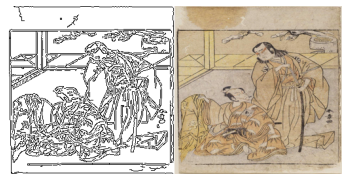

Creating dataset\style_1\CANNY:  60%|██████████████████████▏              | 2998/4990 [01:00<00:37, 52.98it/s]

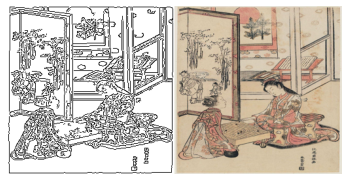

Creating dataset\style_1\CANNY:  80%|█████████████████████████████▋       | 3998/4990 [01:23<00:19, 49.97it/s]

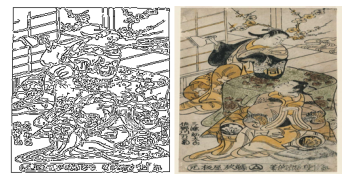

Creating dataset\style_1\CANNY: 100%|█████████████████████████████████████| 4990/4990 [01:45<00:00, 47.40it/s]


In [53]:
generate_dataset('style_1', EdgesType.CANNY, visualize=True)

Creating dataset\style_2\HED:   0%|                                                  | 0/4982 [00:00<?, ?it/s]

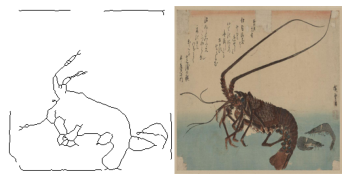

Creating dataset\style_2\HED:  20%|███████▍                             | 1000/4982 [22:10<1:26:00,  1.30s/it]

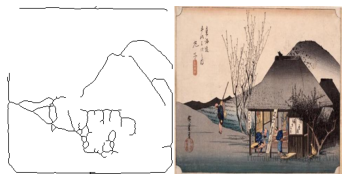

Creating dataset\style_2\HED:  40%|██████████████▊                      | 2000/4982 [43:15<1:02:40,  1.26s/it]

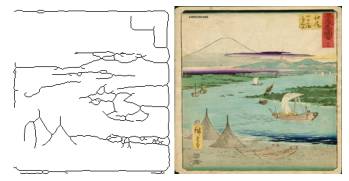

Creating dataset\style_2\HED:  60%|██████████████████████▎              | 3000/4982 [1:04:35<43:15,  1.31s/it]

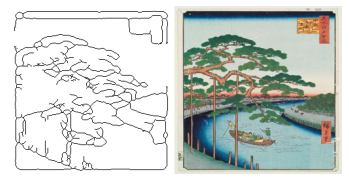

Creating dataset\style_2\HED:  80%|█████████████████████████████▋       | 4000/4982 [1:25:47<21:30,  1.31s/it]

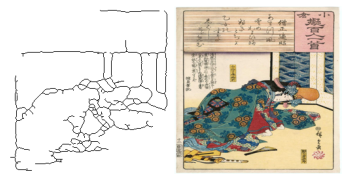

Creating dataset\style_2\HED: 100%|█████████████████████████████████████| 4982/4982 [1:46:05<00:00,  1.28s/it]


In [54]:
generate_dataset('style_2', EdgesType.HED, visualize=True)

Creating dataset\style_2\CANNY:   0%|                                                | 0/4982 [00:00<?, ?it/s]

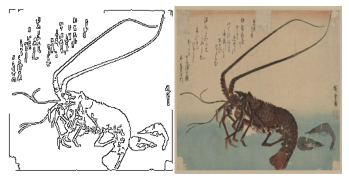

Creating dataset\style_2\CANNY:  20%|███████▎                             | 990/4982 [00:12<00:32, 121.88it/s]

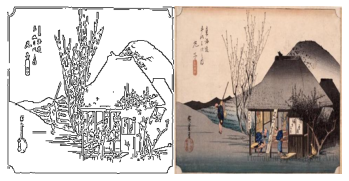

Creating dataset\style_2\CANNY:  40%|██████████████▍                     | 1993/4982 [00:21<00:27, 109.29it/s]

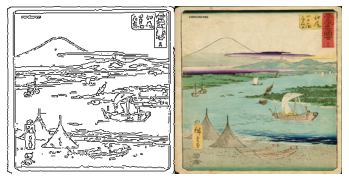

Creating dataset\style_2\CANNY:  60%|██████████████████████▏              | 2992/4982 [00:37<00:22, 87.68it/s]

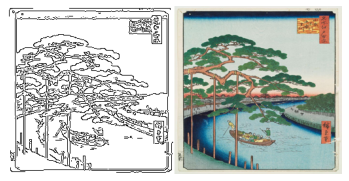

Creating dataset\style_2\CANNY:  80%|█████████████████████████████▋       | 3998/4982 [01:01<00:28, 34.62it/s]

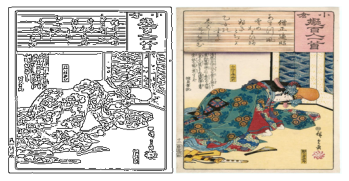

Creating dataset\style_2\CANNY: 100%|█████████████████████████████████████| 4982/4982 [01:25<00:00, 58.32it/s]


In [55]:
generate_dataset('style_2', EdgesType.CANNY, visualize=True)

<a id="section-create_zip"></a>

## Create zip file and download

```
dataset  
├── style_1  
│   ├── CANNY  
│   │   ├── test  
│   │   └── train  
│   └── HED  
│       ├── test  
│       └── train  
└── style_2  
    ├── CANNY  
    │   ├── test  
    │   └── train  
    └── HED  
        ├── test  
        └── train
```

In [59]:
!rm -rf edges2estampes_v2.zip
!zip -qr edges2estampes_v2.zip dataset

In [62]:
!scp edges2estampes_v2.zip lab.theolepage.com:/home/theo/www/upload/datasets